#Selection of features and categories for practice

- Import libraries and load data

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

In [3]:
iris_data = load_iris()

In [4]:
iris_data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [5]:
X = pd.DataFrame(iris_data.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
Y = pd.DataFrame(iris_data.target, columns=['variety'])

select_features= X[['sepal_length', 'petal_length']]
df = pd.concat([select_features, Y], axis=1)
subset = df.loc[(df['variety'] == 1)|(df['variety'] == 2)].reset_index(drop=True)
subset.head()

,sepal_length,petal_length,variety
0,7.0,4.7,1
1,6.4,4.5,1
2,6.9,4.9,1
3,5.5,4.0,1
4,6.5,4.6,1


# Data Analysis

- Scatter plots on selected features

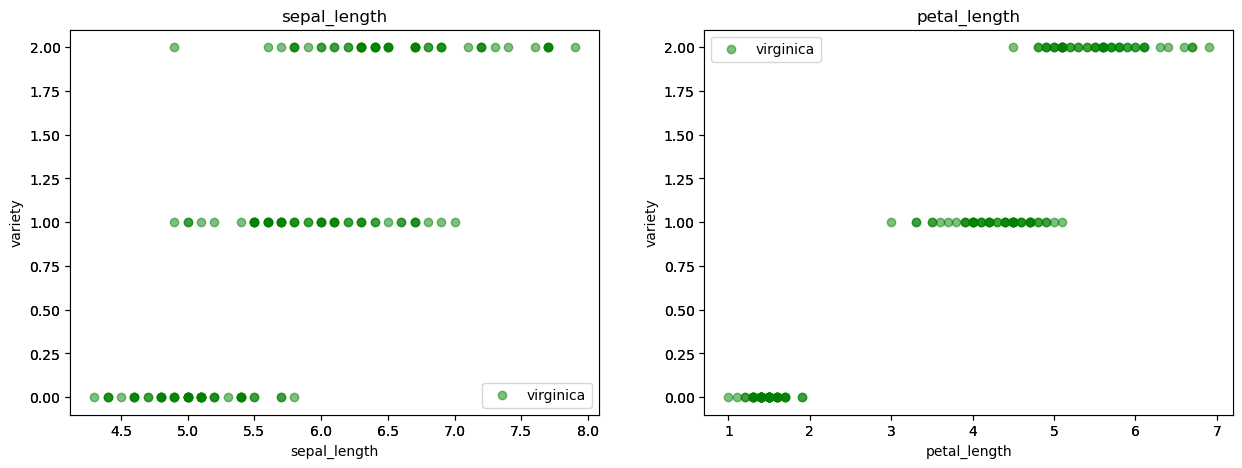

In [13]:
import numpy as np 
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(15, 5))
variety_names = ['versicolor', 'virginica']
x_features = ['sepal_length', 'petal_length']
colors = ['orange', 'green']

for x_feature in range(len(x_features)):
    for a in range(len(variety_names)):
        ax1 = figure.add_subplot(1,2,x_feature+1)
        ax1.scatter(df[x_features[x_feature]],df['variety'],color=colors[a], label=variety_names[a], alpha=0.5)
    ax1.legend()
    ax1.set_title(x_features[x_feature])
    ax1.set_xlabel(x_features[x_feature])
    ax1.set_ylabel('variety')

- Boxplots

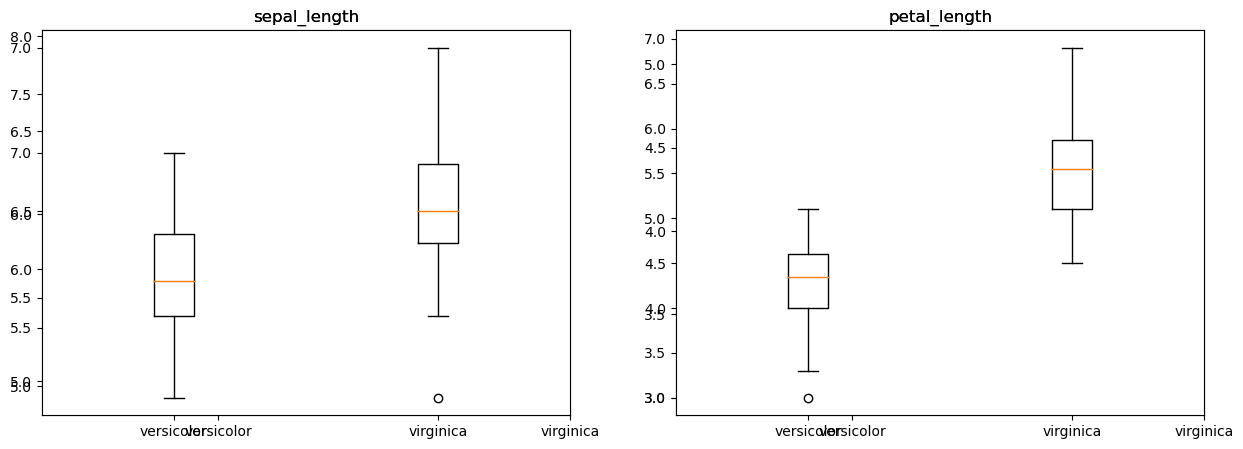

In [15]:
fig = plt.figure(figsize=(15, 5))

import seaborn as sns

for feature in range(len(x_features)):
    x = []
    for i in range(len(variety_names)):
        target_variety = df.loc[df['variety']==i+1]
        x.append(list(target_variety[x_features[feature]]))
        ax2 = fig.add_subplot(1, 2, feature+1)
        ax2.boxplot(x)
        ax2.set_xticks([1, 2])
        ax2.set_xticklabels(variety_names)
        ax2.set_title(x_features[feature])

- Violin plot

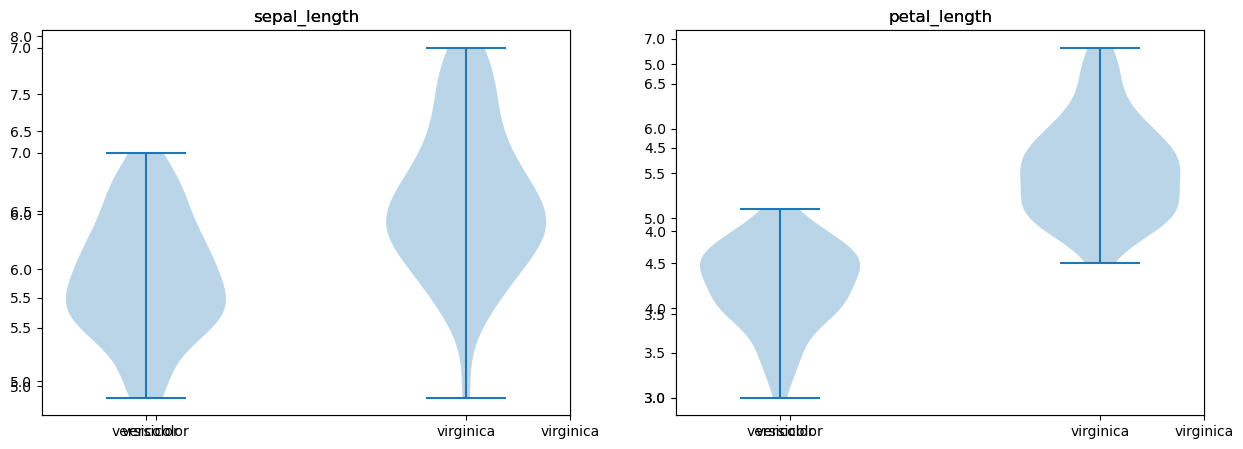

In [17]:
fig = plt.figure(figsize=(15, 5))
for feature in range(len(x_features)):
    x = []
    for i in range(len(variety_names)):
        target_variety = df.loc[df['variety']==i+1]
        x.append(list(target_variety[x_features[feature]]))
        ax2 = fig.add_subplot(1, 2, feature+1)
        ax2.violinplot(x)
        ax2.set_xticks([1, 2])
        ax2.set_xticklabels(variety_names)
        ax2.set_title(x_features[feature])

# Division of preprocessing/training data and validation data

In [18]:
import numpy as np
from sklearn.model_selection import train_test_split

x = np.array(subset.loc[:,['sepal_length', 'petal_length']])
y = np.array(subset['variety'])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Preprocessing and standardization


In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)
x_train_trans = scaler.transform(x_train)
x_test_trans = scaler.transform(x_test)

# Learning and Estimation

In [26]:
from sklearn.neighbors import KNeighborsClassifier

k_neigh_3 = KNeighborsClassifier(n_neighbors=3)
k_neigh_3.fit(x_train_trans, y_train.ravel())
pred_3 = k_neigh_3.predict(x_test_trans)
print('pred3 = ', pred_3)

k_neigh_5 = KNeighborsClassifier(n_neighbors=5)
k_neigh_5.fit(x_train_trans, y_train.ravel())
pred_5 = k_neigh_5.predict(x_test_trans)
print('pred5 = ', pred_5)

k_neigh_1 = KNeighborsClassifier(n_neighbors=1)
k_neigh_1.fit(x_train_trans, y_train.ravel())
pred_1 = k_neigh_1.predict(x_test_trans)
print('pred1 = ', pred_1)

pred3 =  [2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 1 1 1 1 2 1 1 1 2]
pred5 =  [2 2 2 1 1 1 1 2 1 1 1 1 1 2 2 1 1 1 1 1 2 1 1 1 2]
pred1 =  [2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 1 1 1 1 2 1 1 1 2]


C:\Users\Ibrahim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Ibrahim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

# Evaluation

In [28]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

predictions = [pred_3, pred_5, pred_1]
keys = ["knn3","knn5","knn1"]

for a,prediction in enumerate(predictions,0):
    print("predictions of ", keys[a])
    print("accuracy =", accuracy_score(y_true=y_test, y_pred=prediction))
    print("precision =", precision_score(y_true=y_test, y_pred=prediction,average=None))    
    print("recall =", recall_score(y_true=y_test, y_pred=prediction,average=None))  
    print("f1 score =", f1_score(y_true=y_test, y_pred=prediction,average=None)) 
    print("confusion matrix =", confusion_matrix(y_true=y_test, y_pred=prediction)) 
    print("--------------------------------------------------------")

predictions of  knn3
accuracy = 0.8
precision = [0.8 0.8]
recall = [0.85714286 0.72727273]
f1 score = [0.82758621 0.76190476]
confusion matrix = [[12  2]
 [ 3  8]]
--------------------------------------------------------
predictions of  knn5
accuracy = 0.8
precision = [0.76470588 0.875     ]
recall = [0.92857143 0.63636364]
f1 score = [0.83870968 0.73684211]
confusion matrix = [[13  1]
 [ 4  7]]
--------------------------------------------------------
predictions of  knn1
accuracy = 0.8
precision = [0.8 0.8]
recall = [0.85714286 0.72727273]
f1 score = [0.82758621 0.76190476]
confusion matrix = [[12  2]
 [ 3  8]]
--------------------------------------------------------


#  Explanations
- Accuracy: Accuracy is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations

- Precision: Precision is the ratio of correctly predicted positive observations to the total predicted positive observations

- Recall: Recall is the ratio of correctly predicted positive observations to the all observations in actual class

- F1 score: F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account

# Visualization

C:\Users\Ibrahim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


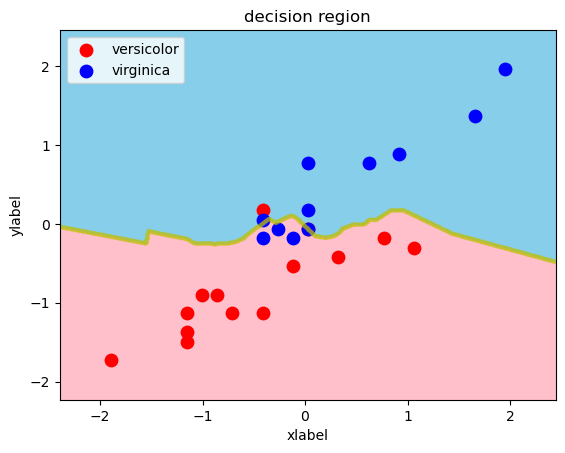

C:\Users\Ibrahim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


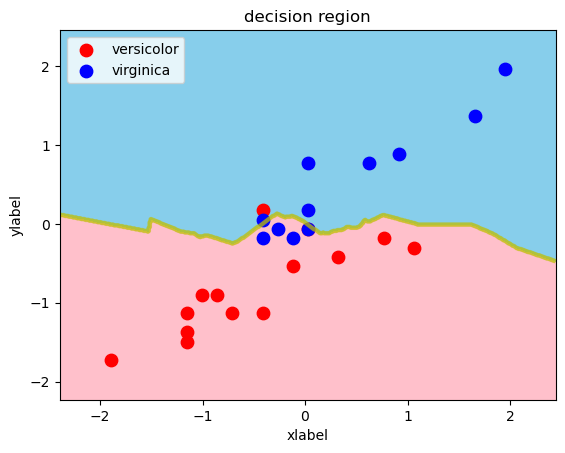

C:\Users\Ibrahim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


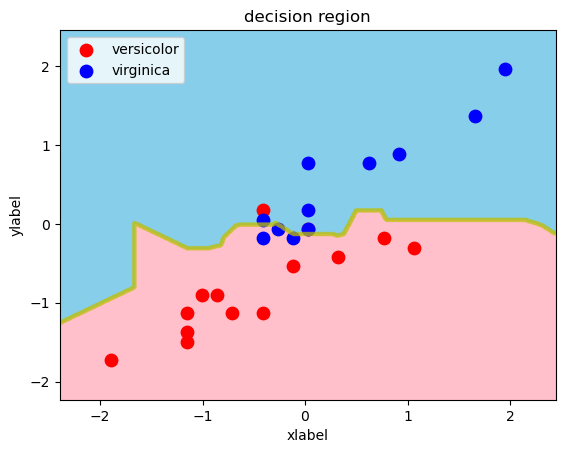

In [32]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2
    # pred
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(X[:,0])-0.5, np.max(X[:,0])+0.5, step), np.arange(np.min(X[:,1])-0.5, np.max(X[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

models = [k_neigh_3, k_neigh_5, k_neigh_1]
for a,model in enumerate(models, 1):
    decision_region(x_test_trans, y_test, model)

# Learning by other methods

- Estimation and evaluation

In [36]:
def display_outputs(title,pred,model,std):
    print(title)
    print("pred = ", pred)
    print("accuracy =", accuracy_score(y_true=y_test, y_pred=pred))
    print("precision =", precision_score(y_true=y_test, y_pred=pred,average=None))    
    print("recall =", recall_score(y_true=y_test, y_pred=pred,average=None))  
    print("f1 score =", f1_score(y_true=y_test, y_pred=pred,average=None)) 
    print("confusion matrix =", confusion_matrix(y_true=y_test, y_pred=pred)) 
    if (std == True):
        decision_region(x_test_trans, y_test, model)
    else:
        decision_region(x_test, y_test, model)
    print("--------------------------------------------------------")

- visualize all methods

Logical Regression
pred =  [2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 1 2 1 1 2 1 1 1 2]
accuracy = 0.84
precision = [0.85714286 0.81818182]
recall = [0.85714286 0.81818182]
f1 score = [0.85714286 0.81818182]
confusion matrix = [[12  2]
 [ 2  9]]


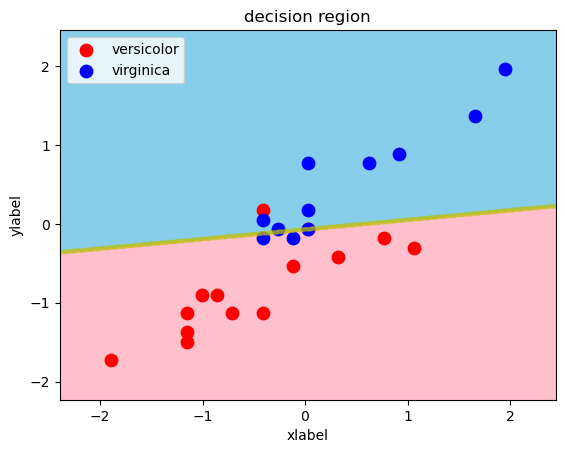

--------------------------------------------------------
SVM
pred =  [2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 1 2 1 1 2 1 1 1 2]
accuracy = 0.84
precision = [0.85714286 0.81818182]
recall = [0.85714286 0.81818182]
f1 score = [0.85714286 0.81818182]
confusion matrix = [[12  2]
 [ 2  9]]


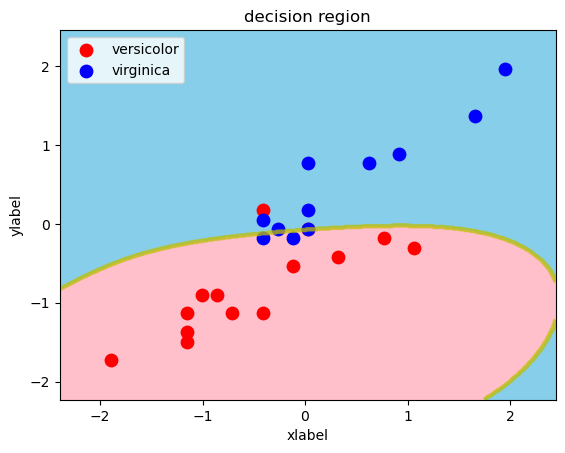

--------------------------------------------------------
Decision tree
pred =  [2 2 2 1 1 1 1 2 1 1 1 1 1 2 2 1 1 2 1 1 2 1 1 1 2]
accuracy = 0.84
precision = [0.8125     0.88888889]
recall = [0.92857143 0.72727273]
f1 score = [0.86666667 0.8       ]
confusion matrix = [[13  1]
 [ 3  8]]


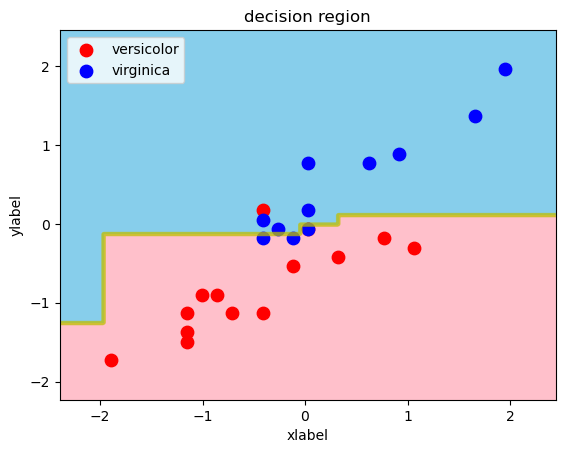

--------------------------------------------------------
Random Forest
pred =  [2 2 2 1 1 1 1 2 1 1 1 1 1 2 2 1 1 1 1 1 2 1 1 1 2]
accuracy = 0.8
precision = [0.76470588 0.875     ]
recall = [0.92857143 0.63636364]
f1 score = [0.83870968 0.73684211]
confusion matrix = [[13  1]
 [ 4  7]]


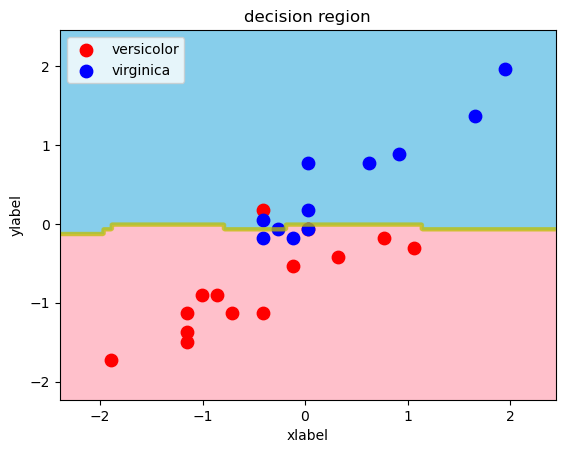

--------------------------------------------------------


In [37]:
#for LogisticRegression
from sklearn.linear_model import LogisticRegression
lR_fit = LogisticRegression(random_state=0).fit(x_train_trans, y_train)
lR_predict = lR_fit.predict(x_test_trans)
display_outputs('Logical Regression',lR_predict,lR_fit,std=True)

#for SVM
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(x_train_trans, y_train)
clf_pred = clf.predict(x_test_trans)
display_outputs('SVM',clf_pred,clf,std=True)

#for Decision tree
from sklearn.tree import DecisionTreeClassifier
dTC = DecisionTreeClassifier(random_state=0)
dTC.fit(x_train_trans, y_train)
dTC_pred = dTC.predict(x_test_trans)
display_outputs('Decision tree',dTC_pred,dTC,std=True)

#for Random forest
from sklearn.ensemble import RandomForestClassifier
rFC = RandomForestClassifier(max_depth=2, random_state=0)
rFC.fit(x_train_trans, y_train)
rFC_pred = rFC.predict(x_test_trans)
display_outputs('Random Forest',rFC_pred,rFC,std=True)

#Comparison
- When we look at all methods, we will see that they all look similar in predicted results, but SVM and logical regression has the highest precision results which makes their results more precise

# (Advanced task) Comparison with and without standardization

C:\Users\Ibrahim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Ibrahim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

Knn
pred =  [2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 1 1 1 1 2 1 1 1 2]
accuracy = 0.8
precision = [0.8 0.8]
recall = [0.85714286 0.72727273]
f1 score = [0.82758621 0.76190476]
confusion matrix = [[12  2]
 [ 3  8]]


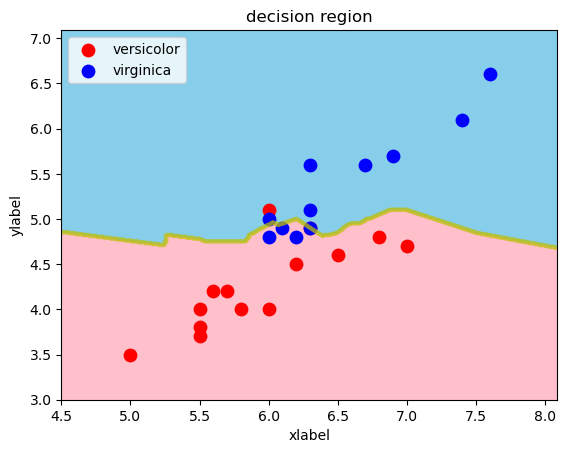

--------------------------------------------------------
Logistic regression
pred =  [2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 1 2 1 1 2 1 1 1 2]
accuracy = 0.84
precision = [0.85714286 0.81818182]
recall = [0.85714286 0.81818182]
f1 score = [0.85714286 0.81818182]
confusion matrix = [[12  2]
 [ 2  9]]


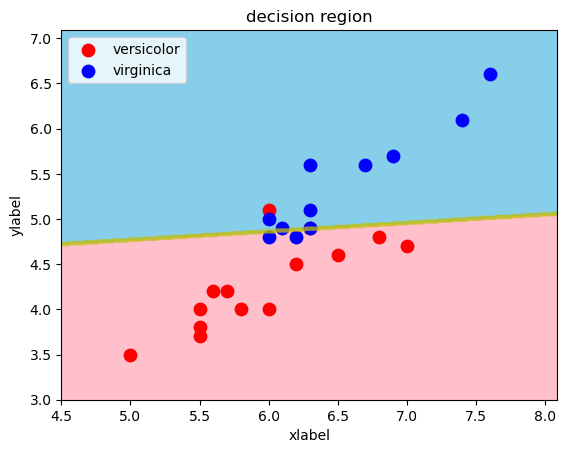

--------------------------------------------------------
SVM
pred =  [2 2 2 1 1 1 2 2 1 1 1 1 2 2 2 1 1 2 1 1 2 1 1 1 2]
accuracy = 0.84
precision = [0.85714286 0.81818182]
recall = [0.85714286 0.81818182]
f1 score = [0.85714286 0.81818182]
confusion matrix = [[12  2]
 [ 2  9]]


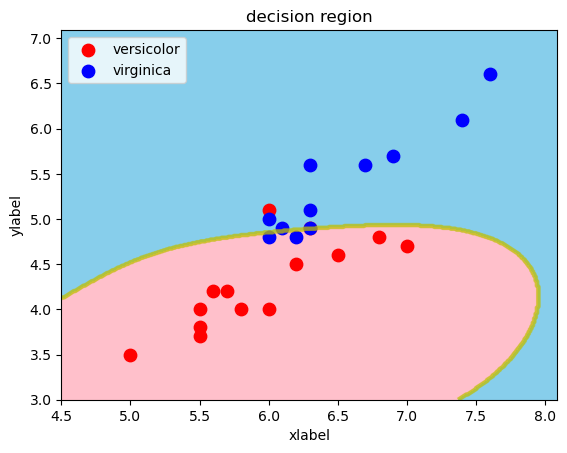

--------------------------------------------------------
Decision tree
pred =  [2 2 2 1 1 1 1 2 1 1 1 1 1 2 2 1 1 2 1 1 2 1 1 1 2]
accuracy = 0.84
precision = [0.8125     0.88888889]
recall = [0.92857143 0.72727273]
f1 score = [0.86666667 0.8       ]
confusion matrix = [[13  1]
 [ 3  8]]


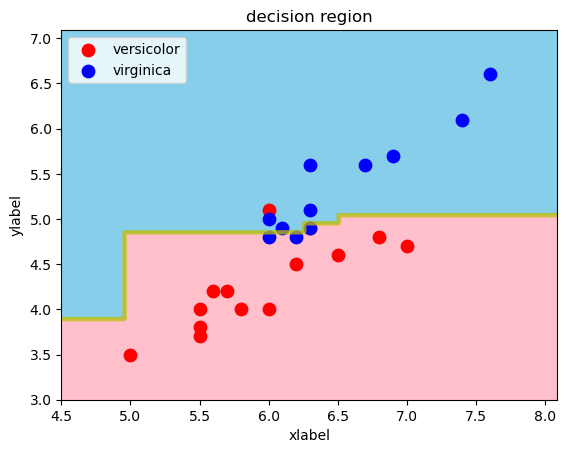

--------------------------------------------------------
Random forest
pred =  [2 2 2 1 1 1 1 2 1 1 1 1 1 2 2 1 1 1 1 1 2 1 1 1 2]
accuracy = 0.8
precision = [0.76470588 0.875     ]
recall = [0.92857143 0.63636364]
f1 score = [0.83870968 0.73684211]
confusion matrix = [[13  1]
 [ 4  7]]


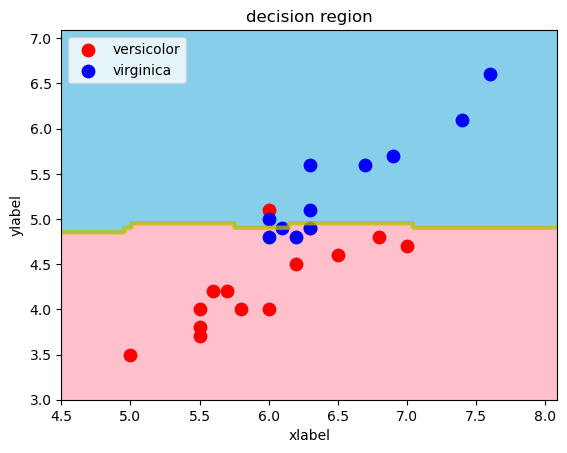

--------------------------------------------------------


In [39]:
# knn
k_neigh_3_2 = KNeighborsClassifier(n_neighbors=3)
k_neigh_3_2.fit(x_train, y_train.ravel())
pred_3_2 = k_neigh_3_2.predict(x_test)
display_outputs('Knn',pred_3_2,k_neigh_3_2,std=False)

# LogisticRegression
from sklearn.linear_model import LogisticRegression
lR_fit = LogisticRegression(random_state=0).fit(x_train, y_train)
lR_predict = lR_fit.predict(x_test)
display_outputs('Logistic regression',lR_predict,lR_fit,std=False)

# SVM
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(x_train, y_train)
clf_pred = clf.predict(x_test)
display_outputs('SVM',clf_pred,clf,std=False)

# Decision tree
from sklearn.tree import DecisionTreeClassifier
dTC = DecisionTreeClassifier(random_state=0)
dTC.fit(x_train, y_train)
dTC_pred = dTC.predict(x_test)
display_outputs('Decision tree',dTC_pred,dTC,std=False)

# Random forest
from sklearn.ensemble import RandomForestClassifier
rFC = RandomForestClassifier(max_depth=2, random_state=0)
rFC.fit(x_train, y_train)
rFC_pred = rFC.predict(x_test)
display_outputs('Random forest',rFC_pred,rFC,std=False)

- Standardization: is a scaling technique where the values are centered around the mean with a unit standard deviation

# (Advanced task) Method with high accuracy using all objective variables

C:\Users\Ibrahim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Ibrahim\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `kee

Knn
pred =  [1 0 2 1 1 0 1 1 1 1 2 0 0 0 0 2 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
accuracy = 0.9473684210526315
precision = [1.         0.90909091 0.91666667]
recall = [1.         0.90909091 0.91666667]
f1 score = [1.         0.90909091 0.91666667]
confusion matrix = [[15  0  0]
 [ 0 10  1]
 [ 0  1 11]]


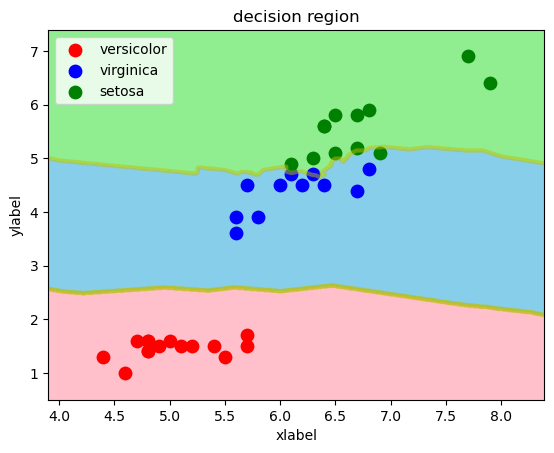

--------------------------------------------------------
Logistic regression
pred =  [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
accuracy = 1.0
precision = [1. 1. 1.]
recall = [1. 1. 1.]
f1 score = [1. 1. 1.]
confusion matrix = [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


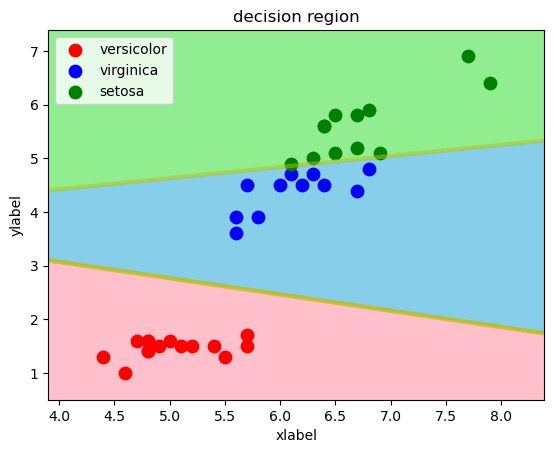

--------------------------------------------------------
SVM
pred =  [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
accuracy = 1.0
precision = [1. 1. 1.]
recall = [1. 1. 1.]
f1 score = [1. 1. 1.]
confusion matrix = [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


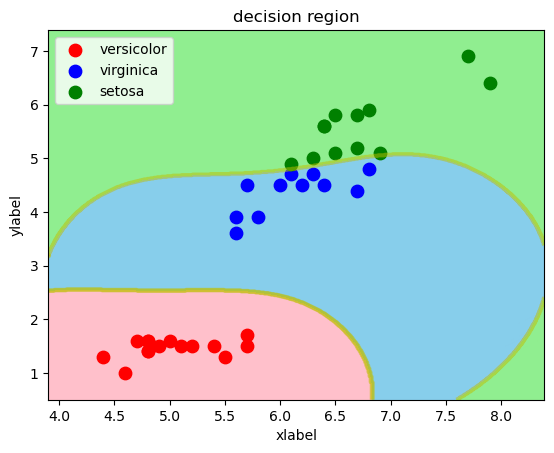

--------------------------------------------------------
Decision tree
pred =  [1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
accuracy = 1.0
precision = [1. 1. 1.]
recall = [1. 1. 1.]
f1 score = [1. 1. 1.]
confusion matrix = [[15  0  0]
 [ 0 11  0]
 [ 0  0 12]]


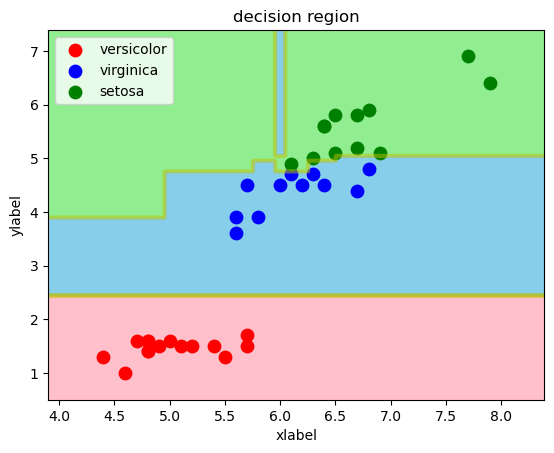

--------------------------------------------------------
Random forest
pred =  [1 0 2 1 2 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0 0 0 1 0 0 2 1
 0]
accuracy = 0.9736842105263158
precision = [1.         1.         0.92307692]
recall = [1.         0.90909091 1.        ]
f1 score = [1.         0.95238095 0.96      ]
confusion matrix = [[15  0  0]
 [ 0 10  1]
 [ 0  0 12]]


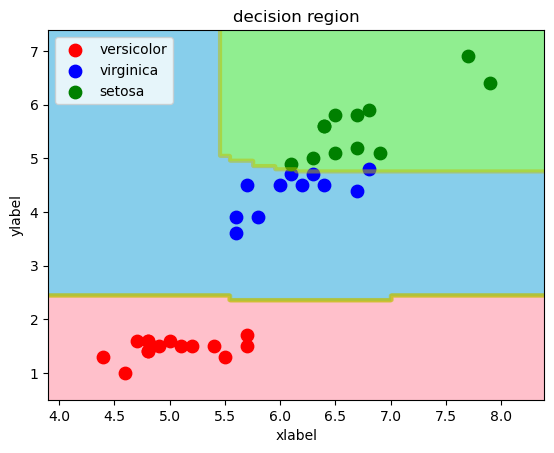

--------------------------------------------------------


In [42]:
def decision_region_2(x, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica','setosa']):
    # setting
    scatter_color = ['red', 'blue', 'green']
    contourf_color = ['pink', 'skyblue', 'lightgreen']
    n_class = 3
    # predition
    mesh_f0, mesh_f1  = np.meshgrid(np.arange(np.min(x[:,0])-0.5, np.max(x[:,0])+0.5, step), np.arange(np.min(x[:,1])-0.5, np.max(x[:,1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0),np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)
    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(x[y==target][:, 0], x[y==target][:, 1], s=80, color=scatter_color[i], label=target_names[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.legend()
    plt.show()

def display_outputs_2(title,pred,model,std):
    print(title)
    print("pred = ", pred)
    print("accuracy =", accuracy_score(y_true=y_test, y_pred=pred))
    print("precision =", precision_score(y_true=y_test, y_pred=pred,average=None))    
    print("recall =", recall_score(y_true=y_test, y_pred=pred,average=None))  
    print("f1 score =", f1_score(y_true=y_test, y_pred=pred,average=None)) 
    print("confusion matrix =", confusion_matrix(y_true=y_test, y_pred=pred)) 
    if (std == True):
        decision_region_2(x_test_trans, y_test, model)
    else:
        decision_region_2(x_test, y_test, model)
    print("--------------------------------------------------------")
    
# new variables with all targets
X2 = df.iloc[:, :-1].values
y2 = df.iloc[:, -1].values

x_train, x_test, y_train, y_test = train_test_split(X2, y2, test_size=0.25, random_state=42)

# knn
k_neigh_3_2 = KNeighborsClassifier(n_neighbors=3)
k_neigh_3_2.fit(x_train, y_train.ravel())
pred_3_2 = k_neigh_3_2.predict(x_test)
display_outputs_2('Knn',pred_3_2,k_neigh_3_2,std=False)

# LogisticRegression
from sklearn.linear_model import LogisticRegression
lR_fit = LogisticRegression(random_state=0).fit(x_train, y_train)
lR_predict = lR_fit.predict(x_test)
display_outputs_2('Logistic regression',lR_predict,lR_fit,std=False)

# SVM
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
clf.fit(x_train, y_train)
clf_pred = clf.predict(x_test)
display_outputs_2('SVM',clf_pred,clf,std=False)

# Decision tree
from sklearn.tree import DecisionTreeClassifier
dTC = DecisionTreeClassifier(random_state=0)
dTC.fit(x_train, y_train)
dTC_pred = dTC.predict(x_test)
display_outputs_2('Decision tree',dTC_pred,dTC,std=False)

# Random forest
from sklearn.ensemble import RandomForestClassifier
rFC = RandomForestClassifier(max_depth=2, random_state=0)
rFC.fit(x_train, y_train)
rFC_pred = rFC.predict(x_test)
display_outputs_2('Random forest',rFC_pred,rFC,std=False)